In [24]:
import pandas as pd #importing all important packagages
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from keras import datasets, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn import svm
import tensorflow as tf 
import skimage.feature

In [25]:
from google.colab import drive    #mounting the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
data = np.load('/content/drive/MyDrive/Coursework/trnImage.npy')    #loading training image files
trnlabel_coarse = np.load('/content/drive/MyDrive/Coursework/trnLabel_coarse.npy')
trnlabel_fine = np.load('/content/drive/MyDrive/Coursework/trnLabel_fine.npy')

tstImage= np.load('/content/drive/MyDrive/Coursework/tstImage.npy')   #loading testing image files
tstLabel_fine= np.load('/content/drive/MyDrive/Coursework/tstLabel_fine.npy')
testLabel_coarse= np.load('/content/drive/MyDrive/Coursework/tstLabel_coarse.npy')


In [27]:
transposed = np.transpose(data, [3,0,1,2])  #transposing data to work with indexing within the model
print(f'Shape of transposed: {transposed.shape}')

trasnsposed_tst=np.transpose(tstImage, [3,0,1,2]) #printing to check the shape of the newly transposed data

Shape of transposed: (50000, 32, 32, 3)


# **CNN**

In [28]:
from keras.layers.core.dropout import Dropout     
batch_size = 50 #Setting up batch size for faster processing
loss_function = sparse_categorical_crossentropy #better projection of loss
no_classes = 100  #classes for coarse dataset
verbosity = 1 #wanting to see output while training
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))  #first layer of CNN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  #second layer of CNN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #third layer of CNN
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6)) 
model.add(Flatten())                                          #flattening the dataset
model.add(Dense(256, activation='relu'))                      #Density layers 
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [29]:
TLF = tf.keras.utils.to_categorical(trnlabel_coarse,100)      #Tuning the dataset
print(TLF.shape)

(50000, 100)


In [ ]:
opt='adam'                                                     #setting optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history= model.fit(transposed,TLF, epochs=30, batch_size=batch_size,  #fitting the model of data
            verbose=verbosity, validation_split=0.2)

Epoch 1/30
800/800 [==============================] - 66s 81ms/step - loss: 2.7988 - accuracy: 0.1276 - val_loss: 2.7037 - val_accuracy: 0.1658
Epoch 2/30
800/800 [==============================] - 65s 81ms/step - loss: 2.5148 - accuracy: 0.2195 - val_loss: 2.5581 - val_accuracy: 0.2277
Epoch 3/30
800/800 [==============================] - 65s 81ms/step - loss: 2.4054 - accuracy: 0.2513 - val_loss: 2.3937 - val_accuracy: 0.2817
Epoch 4/30
800/800 [==============================] - 65s 82ms/step - loss: 2.3413 - accuracy: 0.2737 - val_loss: 2.3660 - val_accuracy: 0.2804
Epoch 5/30
800/800 [==============================] - 65s 82ms/step - loss: 2.2906 - accuracy: 0.2880 - val_loss: 2.2877 - val_accuracy: 0.3096
Epoch 6/30
800/800 [==============================] - 66s 82ms/step - loss: 2.2511 - accuracy: 0.3027 - val_loss: 2.3094 - val_accuracy: 0.3090
Epoch 7/30
800/800 [==============================] - 66s 82ms/step - loss: 2.2188 - accuracy: 0.3104 - val_loss: 2.2451 - val_accuracy:

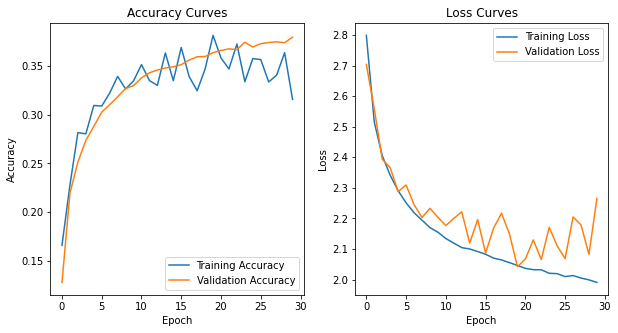

In [ ]:
plt.figure(figsize=[10,5])                            #plotting the figure
plt.subplot(121)
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

In [ ]:
from keras.layers.core.dropout import Dropout
batch_size = 50
loss_function = sparse_categorical_crossentropy
no_classes = 100
verbosity = 1
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [ ]:
TLF2 = tf.keras.utils.to_categorical(trnlabel_fine)
print(TLF2.shape)
print(transposed.shape)

(50000, 100)
(50000, 32, 32, 3)


In [ ]:
opt='adam'
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history2= model.fit(transposed,TLF2, epochs=70, batch_size=batch_size,
            verbose=verbosity, validation_split=0.2)

Epoch 1/70
800/800 [==============================] - 70s 87ms/step - loss: 4.3411 - accuracy: 0.0349 - val_loss: 4.1605 - val_accuracy: 0.0607
Epoch 2/70
800/800 [==============================] - 66s 83ms/step - loss: 3.9231 - accuracy: 0.0878 - val_loss: 4.0198 - val_accuracy: 0.0858
Epoch 3/70
800/800 [==============================] - 68s 85ms/step - loss: 3.7452 - accuracy: 0.1171 - val_loss: 3.8958 - val_accuracy: 0.0987
Epoch 4/70
800/800 [==============================] - 67s 84ms/step - loss: 3.6179 - accuracy: 0.1393 - val_loss: 3.6733 - val_accuracy: 0.1500
Epoch 5/70
800/800 [==============================] - 68s 85ms/step - loss: 3.5276 - accuracy: 0.1536 - val_loss: 3.7543 - val_accuracy: 0.1333
Epoch 6/70
800/800 [==============================] - 68s 85ms/step - loss: 3.4526 - accuracy: 0.1686 - val_loss: 3.6043 - val_accuracy: 0.1461
Epoch 7/70
800/800 [==============================] - 68s 85ms/step - loss: 3.3935 - accuracy: 0.1805 - val_loss: 3.6318 - val_accuracy:

In [ ]:
model.summary()

In [ ]:
plt.figure(figsize=[10,5])        #plotting the figure
plt.subplot(121)
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

# SVM Training

In [ ]:
train_hog=[]
test_hog=[]

for i in range (len(transposed)):
  hog_feature, hog_image = skimage.feature.hog(transposed[i], pixels_per_cell=[6,6],cells_per_block=[2,2], visualize=True, multichannel=True)
  train_hog.append(hog_feature)


In [ ]:
for i in range (len(trasnsposed_tst)):
  hog_feature, hog_image = skimage.feature.hog(trasnsposed_tst[i], pixels_per_cell=[6,6],cells_per_block=[2,2], visualize=True, multichannel=True)
  test_hog.append(hog_feature)

In [ ]:
SVM_model1=svm.SVC(kernel="linear")
SVM_model1.fit(train_hog,trnlabel_fine)
Prediction= SVM_model1.predict(test_hog)
Prediction

In [ ]:
acci= accuracy_score(tstLabel_fine, Prediction)
print(acci)

In [ ]:
coarse_train_hog=[]
coarse_test_hog=[]

for i in range (len(transposed)):
  hog_feature, hog_image = skimage.feature.hog(transposed[i], pixels_per_cell=[6,6],cells_per_block=[2,2], visualize=True, multichannel=True)
  coarse_train_hog.append(hog_feature)

In [ ]:
for i in range (len(trasnsposed_tst)):
  hog_feature, hog_image = skimage.feature.hog(trasnsposed_tst[i], pixels_per_cell=[6,6],cells_per_block=[2,2], visualize=True, multichannel=True)
  coarse_test_hog.append(hog_feature)

In [ ]:
SVM_model2=svm.SVC(kernel="linear")
SVM_model2.fit(coarse_train_hog,trnlabel_coarse)
Prediction2= SVM_model2.predict(coarse_test_hog)
Prediction2

In [ ]:
acci= accuracy_score(testLabel_coarse, Prediction)
print(acci)